This notebook plots the parameter space bins for the TOIs that we've chosen for the TKS selection algorithm and known planets that have masses and a TSM at least 1/2 as good as the TOI with the best TSM in that bin. It's essentially the same as shown in the plotting at the end of icar_sample.ipynb, just in a shorter format, loading the data from file.

In [85]:
# Load necessary packages and tools

# System
import os
import sys
import glob

# Data/analysis
import numpy as np
import pandas as pd
pd.options.display.max_columns = 100 # See all of the columns when DFs are displayed

# Util functions
from priority_tools import * # Implementation details and comments can be found in this file
from X_ranking import get_X_ranked_df

# Plotting (with fancy font/backend output)
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # For high quality figures

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
# Define the parameter space bins
rad_bins = 10**(np.linspace(0,1,6)) 
rad_bins[-1] = 11.2 #want to include up to Jupiter radius 
fpl_bins = 10**(np.linspace(-1,4,6))
tef_bins = np.array([2500,3900,5200,6500])
bins = [rad_bins, fpl_bins, tef_bins]

In [87]:
def plot_bins(data, use_alpha=False):
    '''
    Given a data (a pandas DataFrame) plot targets in their bin, assigning priorities related to their X_priority.
    '''
    # Code in this cell adapted from Nicholas
    for i in np.arange(1,6):
        bin_plotter(data.rename(columns={'X_priority':'priority'}), bins, i, use_alpha=use_alpha, 
                    save_fig=False)#,
                    #save_fname=f'plots/sc3_review/sc3_bins_radius_bin_{i}.pdf')

In [89]:
# Load the TOIs that are ranked >= 5 in their bin, with 
selected_toi_targets_df = pd.read_csv('data/sc3_target_lists/sc3_target_list_2020-07-21.csv')
selected_toi_targets_df = selected_toi_targets_df.set_index(['radius_bin', 'insol_bin', 'st_Teff_bin']).sort_index()

kps_good_TSM_and_mass_df = pd.read_csv('data/known_planets/kps_w_good_TSM_in_bin_2020-07-21.csv')
kps_good_TSM_and_mass_df = kps_good_TSM_and_mass_df.set_index(['radius_bin', 'insol_bin', 'st_Teff_bin']).sort_index()

tois_and_kp_good_TSM_mass_flag_1_df = pd.concat((selected_toi_targets_df, kps_good_TSM_and_mass_df), sort=False)

In [90]:
toi_620_row = pd.read_csv('data/toi/toi+-2020-07-21.csv', comment='#')
toi_620_row = toi_620_row[toi_620_row['Full TOI ID'] == 620.01]
toi_620_row['radius_bin'], toi_620_row['insol_bin'], toi_620_row['st_Teff_bin'] = 3,2,1
toi_620_row = toi_620_row.set_index(['radius_bin', 'insol_bin', 'st_Teff_bin']).sort_index()

In [91]:
sc3_sample_tois = [266.01, 266.02, 469.01, 509.01, 554.01, 620.01, 669.01, 
                   1136.03, 1247.01, 1339.01, 1339.02, 1410.01, 1430.01, 1471.01, 
                   1473.01, 1736.01, 1759.01, 1835.01, 2018.01]
sc3_sample = selected_toi_targets_df[selected_toi_targets_df['Full TOI ID'].isin(sc3_sample_tois)]

sc3_sample = pd.concat((sc3_sample, toi_620_row), sort=False)

sc3_sample_w_kps = pd.concat((sc3_sample, kps_good_TSM_and_mass_df), sort=False)

In [92]:
sc3_sample

Source Pipeline  Full TOI ID  \
radius_bin insol_bin st_Teff_bin                                
2          3         2                      spoc      1430.01   
           4         3                      spoc      1835.01   
                     3                      spoc      1473.01   
                     3                      spoc       266.01   
                     3                      spoc       266.02   
3          2         2                      spoc      1759.01   
           3         2                      spoc      2018.01   
                     3                      spoc      1339.01   
                     3                      spoc       469.01   
                     3                      spoc      1339.02   
                     3                      spoc      1247.01   
           4         2                      spoc      1410.01   
                     3                      spoc       509.01   
                     3                      spoc       554.01   
                     3                      spoc      1736.01   
                     3                      spoc       669.01   
4          3         3                      spoc      1471.01   
                     3                      spoc      1136.03   
3          2         1                      spoc       620.01   

                                  Planet Radius Value  Orbital Period Value  \
radius_bin insol_bin st_Teff_bin                                              
2          3         2                       2.229178              7.434007   
           4         3                       2.340000              5.641960   
                     3                       2.493360              5.255294   
                     3                       2.407741             10.767807   
                     3                       1.759371              6.191320   
3          2         2                       3.234794             37.696127   
           3         2                       2.605087              7.437115   
                     3                       3.200173              8.880406   
                     3                       3.685246             13.632935   
                     3                       3.067978             28.579356   
                     3                       2.800653             15.923849   
           4         2                       2.943638              1.216835   
                     3                       2.936300              9.059882   
                     3                       3.411592              7.048602   
                     3                       3.702256              7.074152   
                     3                       3.842242              3.948678   
4          3         3                       4.282738             20.772024   
                     3                       4.037327             26.321864   
3          2         1                       2.729669              5.098373   

                                  Effective Temperature Value  \
radius_bin insol_bin st_Teff_bin                                
2          3         2                                5064.00   
           4         3                                5297.00   
                     3                                5958.00   
                     3                                5784.00   
                     3                                5784.00   
3          2         2                                3960.00   
           3         2                                4218.90   
                     3                                5555.70   
                     3                                6114.00   
                     3                                5555.70   
                     3                                5711.85   
           4         2                                4634.60   
                     3                                5560.26   
                     3          

/Users/josephmurphy/Documents/UCSC/research/2019-20/tks_target_shared/priority_tools.py:753: PerformanceWarning: indexing past lexsort depth may impact performance.
  ax.set_yticks(tef_bins)


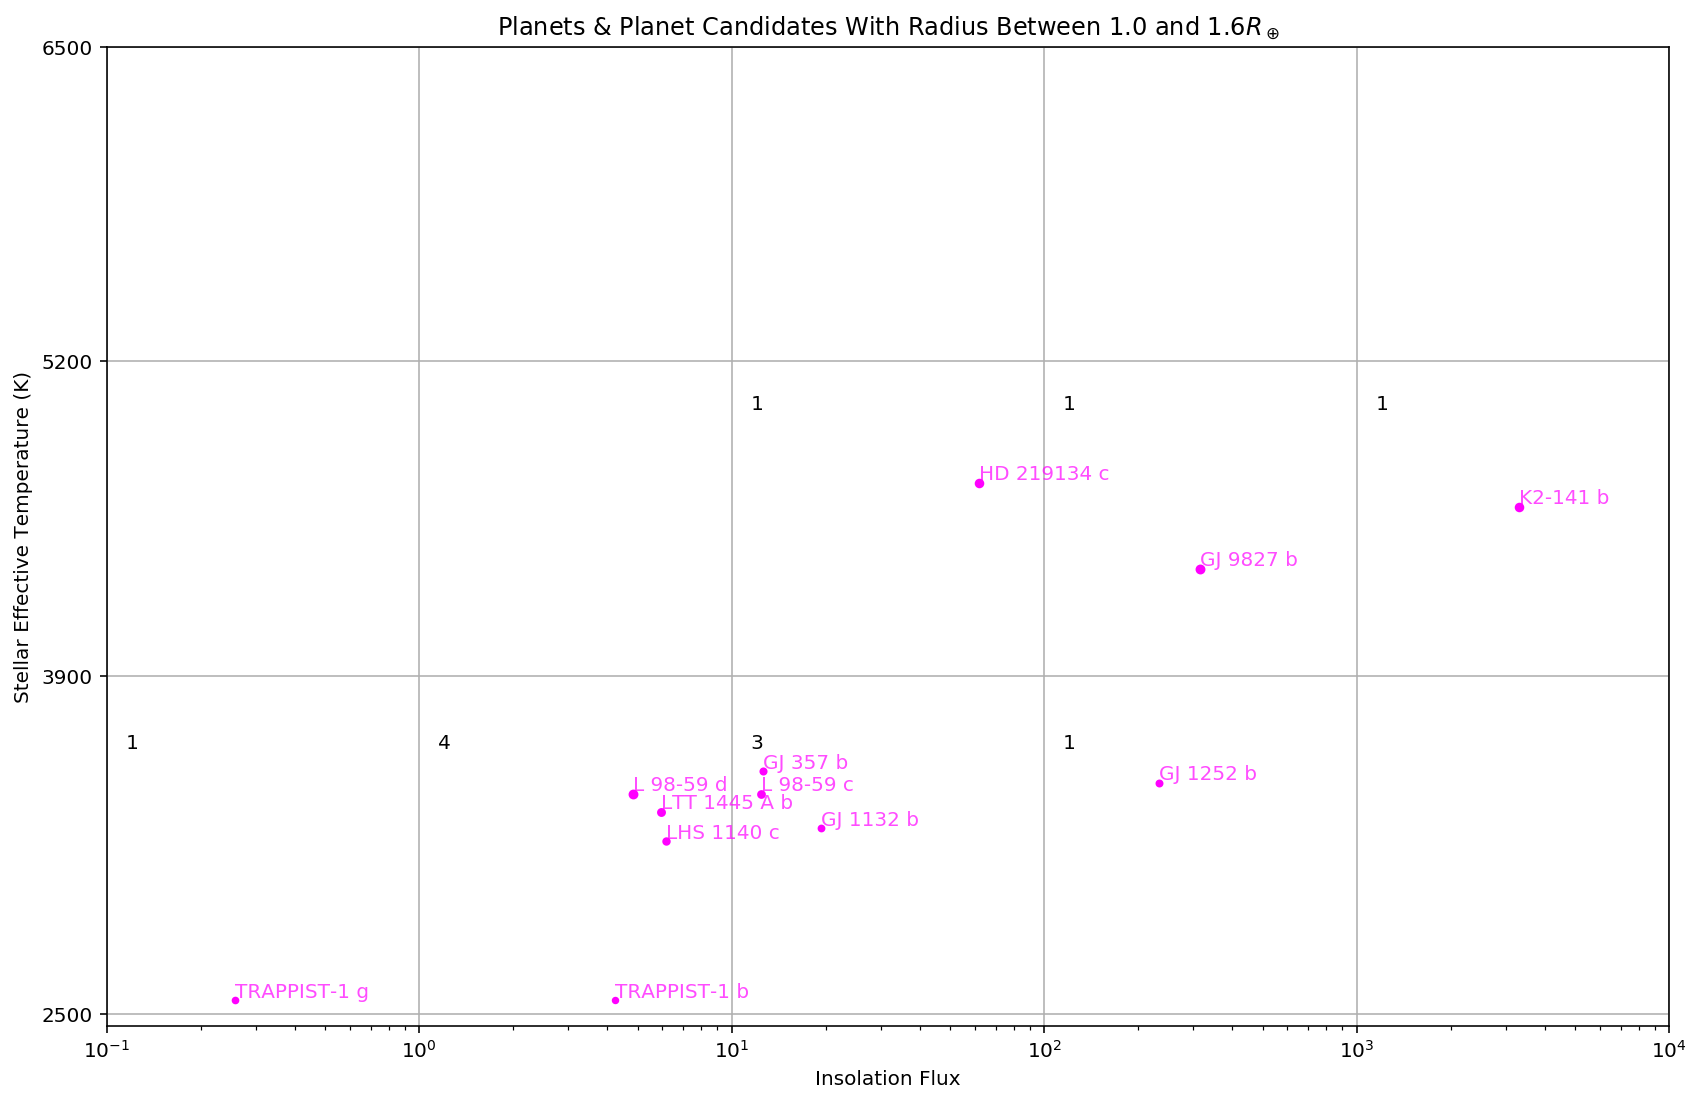

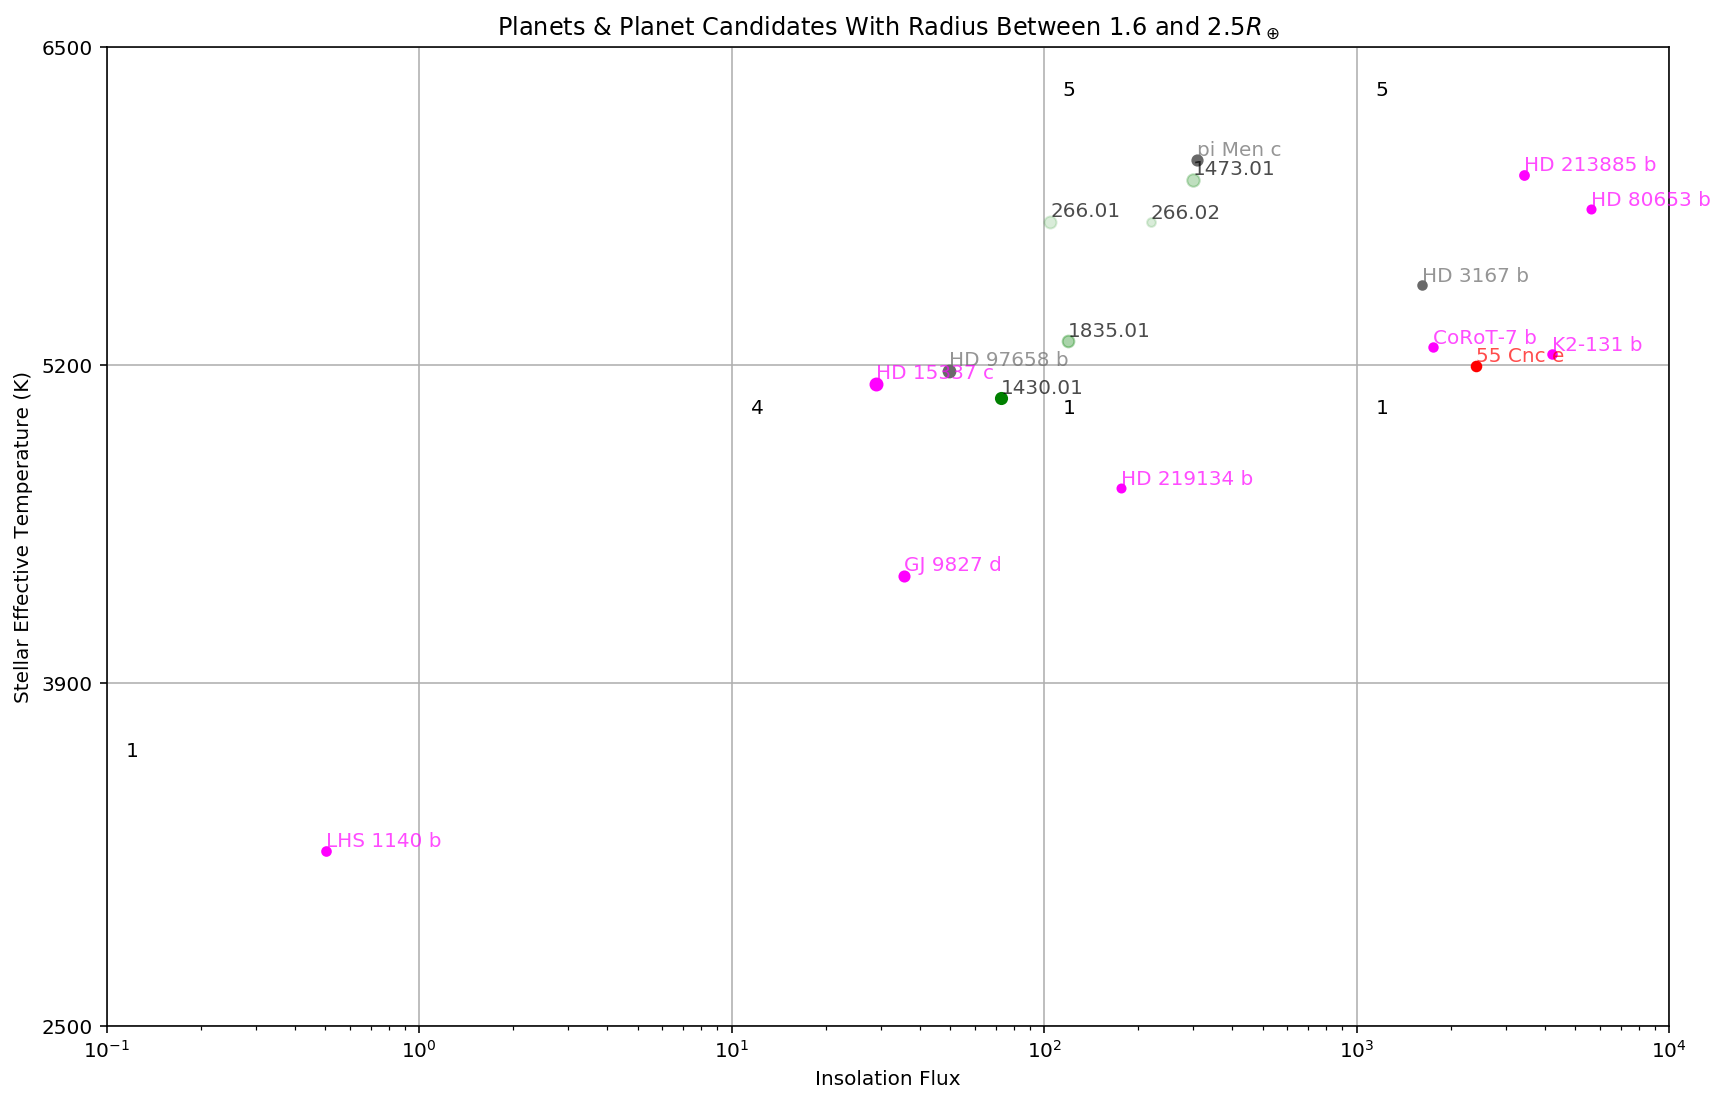

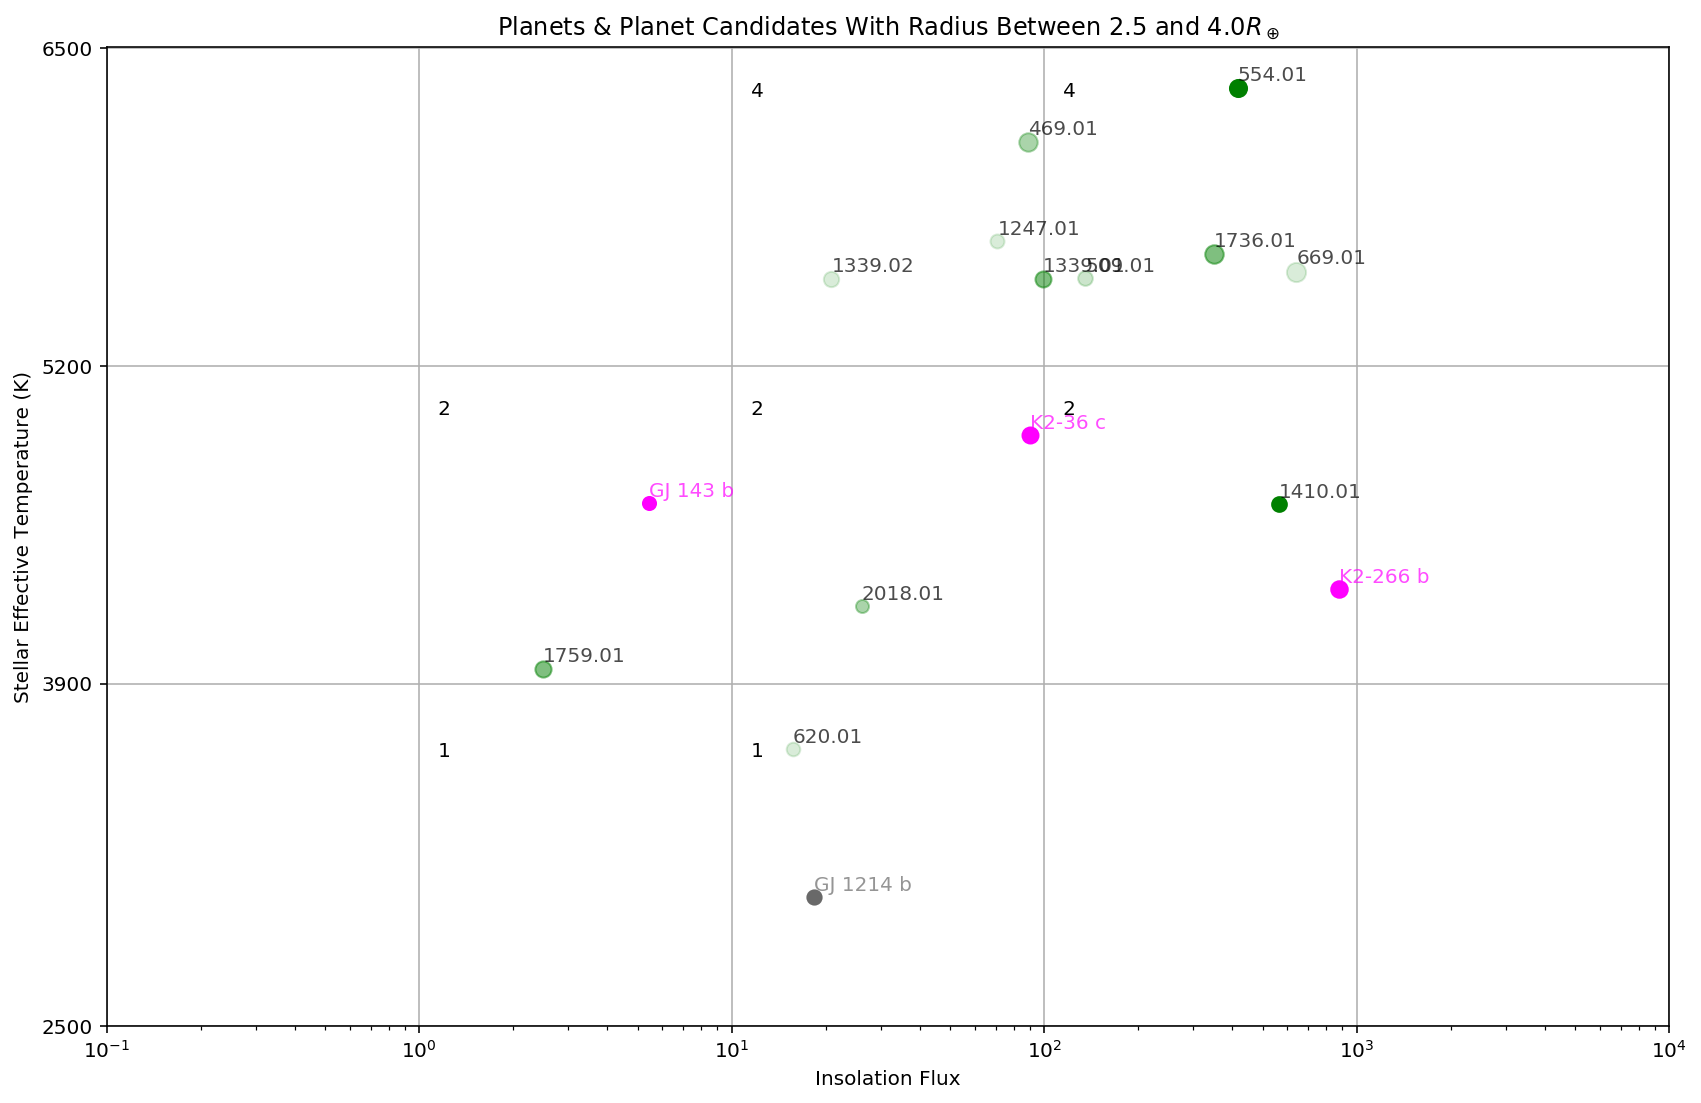

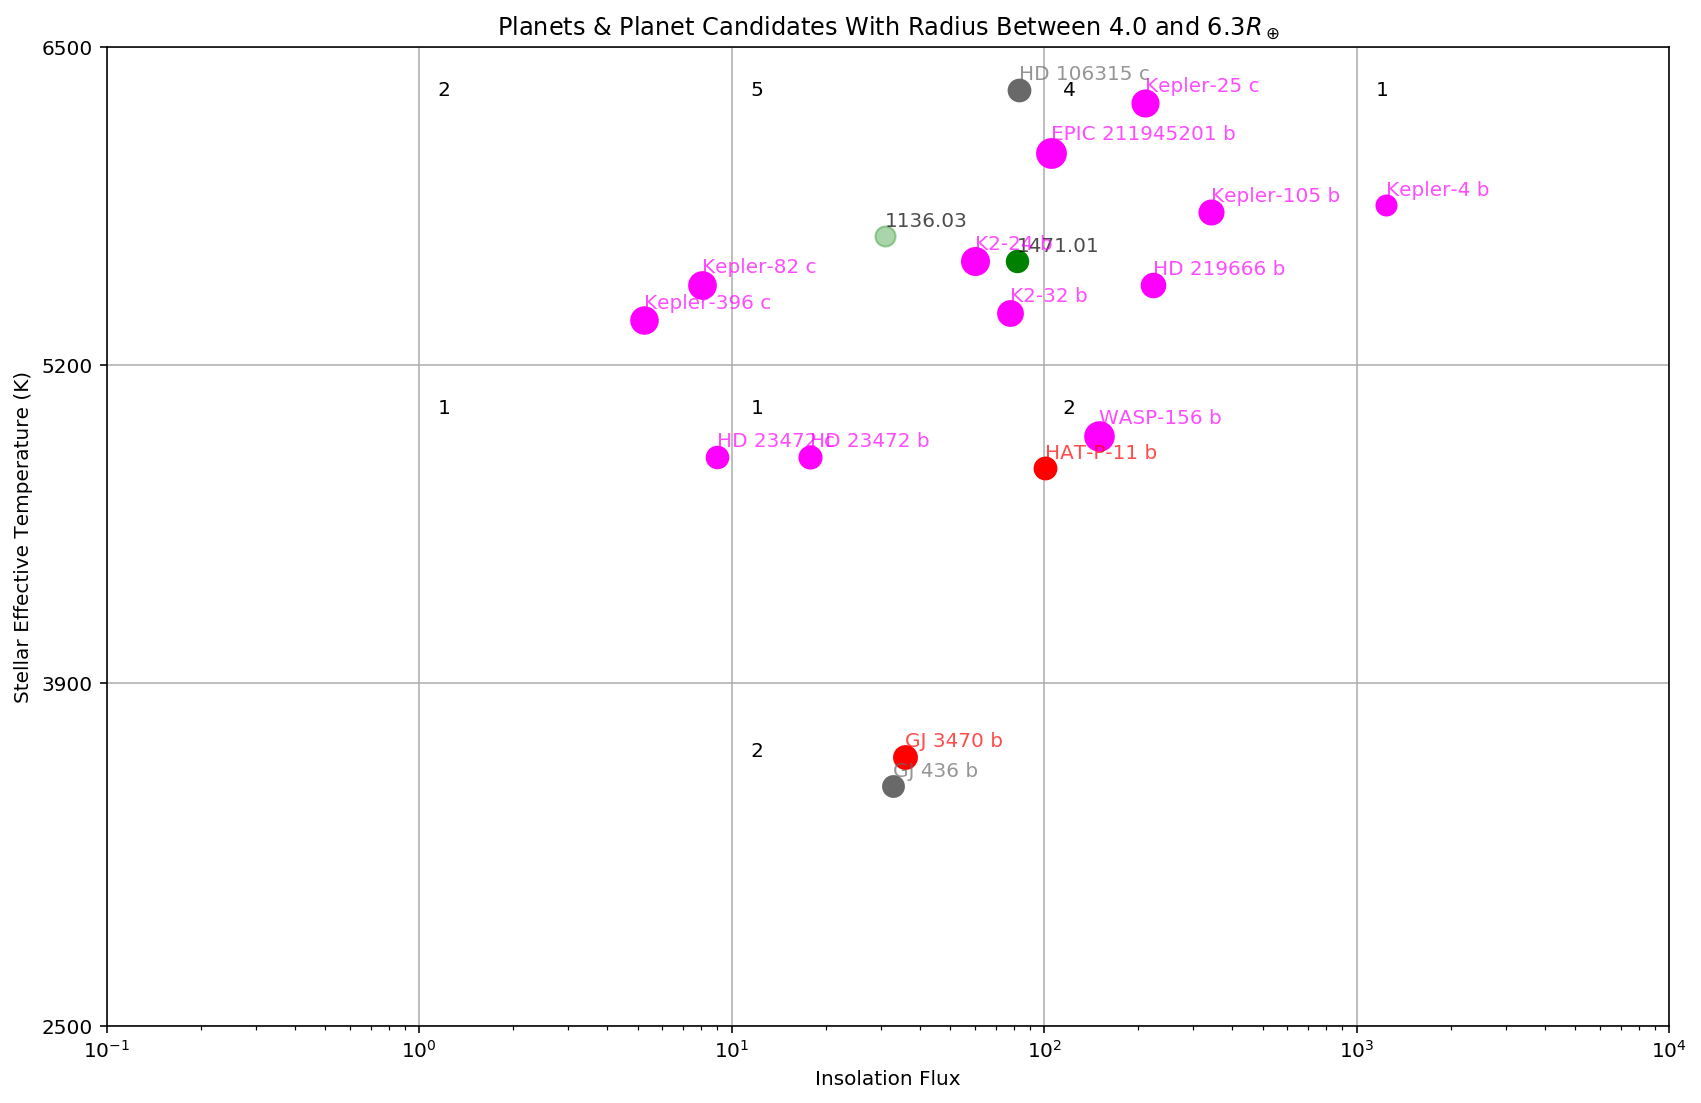

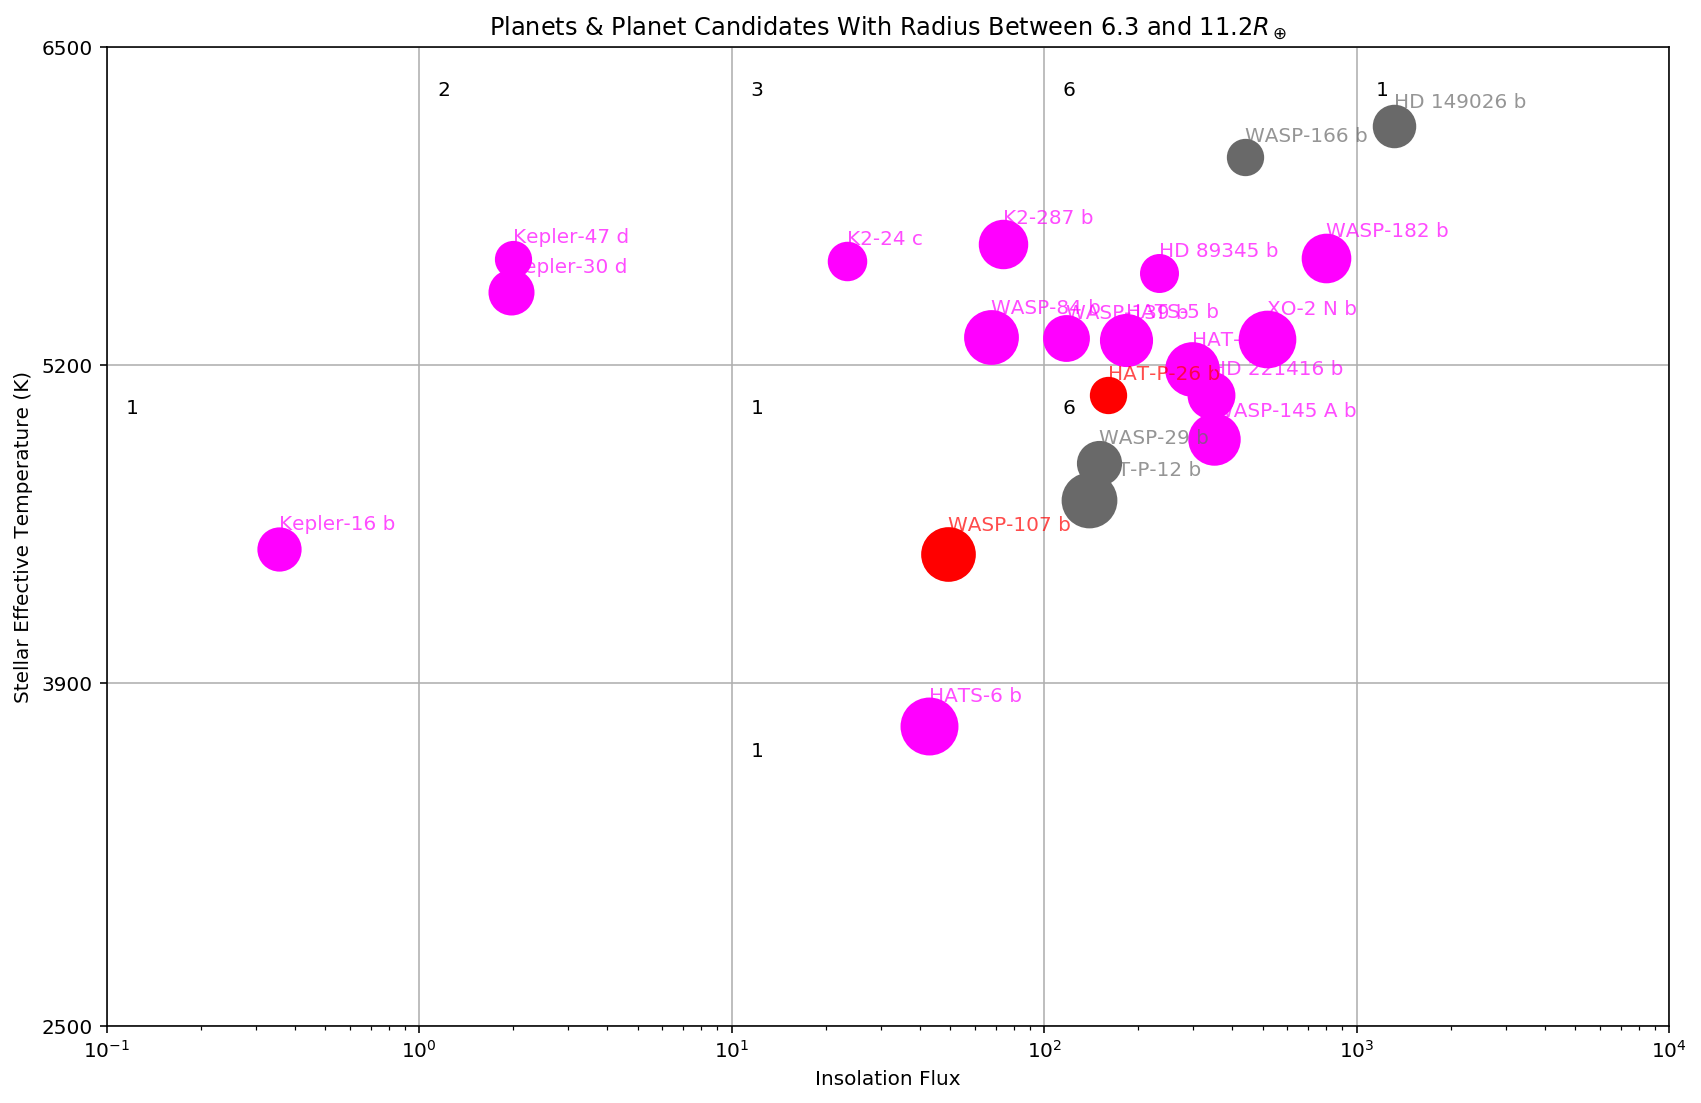

In [93]:
plot_bins(sc3_sample_w_kps, use_alpha=True)

In [84]:
# Examine the sample compared against KPs by bin
sc3_sample_w_kps.loc[2,4,3].sort_values('TSM', ascending=False)

/Users/josephmurphy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  


Source Pipeline Full TOI ID  \
radius_bin insol_bin st_Teff_bin                               
2.0        4.0       3.0                     NaN    pi Men c   
                     3.0                    spoc     1835.01   
                     3.0                    spoc     1473.01   
                     3.0                    spoc      266.01   
                     3.0                    spoc      266.02   

                                  Planet Radius Value  Orbital Period Value  \
radius_bin insol_bin st_Teff_bin                                              
2.0        4.0       3.0                     2.042000              6.267900   
                     3.0                     2.340000              5.641960   
                     3.0                     2.493360              5.255294   
                     3.0                     2.407741             10.767807   
                     3.0                     1.759371              6.191320   

                                  Effective Temperature Value  \
radius_bin insol_bin st_Teff_bin                                
2.0        4.0       3.0                               6037.0   
                     3.0                               5297.0   
                     3.0                               5958.0   
                     3.0                               5784.0   
                     3.0                               5784.0   

                                  Effective Stellar Flux Value  \
radius_bin insol_bin st_Teff_bin                                 
2.0        4.0       3.0                            307.131467   
                     3.0                            119.417118   
                     3.0                            299.625751   
                     3.0                            104.770454   
                     3.0                            219.127828   

                                  Planet Equilibrium Temperature (K) Value  \
radius_bin insol_bin st_Teff_bin                                             
2.0        4.0       3.0                                               NaN   
                     3.0                                        843.114185   
                     3.0                                       1061.120081   
                     3.0                                        815.979892   
                     3.0                                        981.282679   

                                  mass_flag   V mag     K_amp         TSM  \
radius_bin insol_bin st_Teff_bin                                            
2.0        4.0       3.0                1.0   5.670  1.581148  304.402480   
                     3.0                0.0   8.419  2.335822  162.326418   
                     3.0                0.0   8.844  2.362245   97.258434   
                     3.0                0.0  10.070  2.046347   48.271160   
                     3.0                0.0  10.070  1.443660   38.607739   

                                       t_HIRES         X  TSM_Vmag_priority  \
radius_bin insol_bin st_Teff_bin                                              
2.0        4.0       3.0             90.050403  3.380357                1.0   
                     3.0           2525.982886  0.064263                2.0   
                     3.0           3653.087060  0.026624                NaN   
                     3.0          15057.452664  0.003206                NaN   
                     3.0          30253.813001  0.001276                NaN   

                                  X_priority      toi          tic      cps  \
radius_bin insol_bin st_Teff_bin                                              
2.0        4.0       3.0                 1.0      NaN          NaN      NaN   
                     3.0                 3.0  1835.01  347332255.0   110067   
                     3.0                 4.0  1473.01  352413427.0     6061   
                     3.0                 NaN   266.01  164767175.0  HIP8152

Planets that are magenta are known planets with a mass measurement and a TSM value that is at least half as good as the best TSM value for a TOI in that bin.

There are 8 bins in which there are no known planets with masses that are also good atmospheric targets:

(1,5,3)

(2,2,1)

(3,4,2)

(3,3,3)

(3,4,3)

(3,5,3)

(4,5,2)

Notice that there are several bins that have planets with masses that are good atmospheric targets in their bin, but don't yet have spectra.

In [10]:
# What are the TOIs in those bins? Plug in the bin here:
tois_and_kp_good_TSM_mass_flag_1_df.loc[(3,3,3)].sort_values('TSM', ascending=False)

/Users/josephmurphy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  


Effective Stellar Flux Value  \
radius_bin insol_bin st_Teff_bin                                 
3.0        3.0       3.0                             35.353393   
                     3.0                             99.072187   
                     3.0                             89.071512   
                     3.0                             18.616337   
                     3.0                             66.330454   
                     3.0                             73.760947   
                     3.0                             20.850938   
                     3.0                             14.800000   
                     3.0                             78.208616   
                     3.0                             70.932692   
                     3.0                             59.350052   
                     3.0                             91.580168   
                     3.0                             38.003128   

                                  Effective Temperature Value Full TOI ID  \
radius_bin insol_bin st_Teff_bin                                            
3.0        3.0       3.0                              5694.11     1726.02   
                     3.0                              5555.70     1339.01   
                     3.0                              6114.00      469.01   
                     3.0                              5528.00   HD 3167 c   
                     3.0                              5391.00      561.01   
                     3.0                              5853.70     1774.01   
                     3.0                              5555.70     1339.02   
                     3.0                              5555.70     1339.03   
                     3.0                              5320.00   TOI-125 c   
                     3.0                              5711.85     1247.01   
                     3.0                              5759.00     1691.01   
                     3.0                              5777.00     1723.01   
                     3.0                              5391.00      561.03   

                                     K_amp  Orbital Period Value  \
radius_bin insol_bin st_Teff_bin                                   
3.0        3.0       3.0          1.734137             20.545913   
                     3.0          3.311155              8.880406   
                     3.0          3.216821             13.632935   
                     3.0          2.109275             29.838320   
                     3.0          4.159028             10.781327   
                     3.0          1.920874             16.710042   
                     3.0          2.087502             28.579356   
                     3.0          1.990101             38.350000   
                     3.0          2.245340              9.150590   
                     3.0          2.079049             15.923849   
                     3.0          3.330110             16.731638   
                     3.0          2.652552             13.716057   
                     3.0          2.235564             16.371650   

                                  Planet Equilibrium Temperature (K) Value  \
radius_bin insol_bin st_Teff_bin                                             
3.0        3.0       3.0                                        621.909976   
                     3.0                                        804.651244   
                     3.0                                        783.527882   
                     3.0                                               NaN   
                     3.0                                        727.860233   
                     3.0                                        747.440061   
                     3.0                                        545.005831   
                     3.0                                        499.000000   
                     3.0                                               NaN   
        

In [11]:
selected_toi_targets_df

Source Pipeline  Full TOI ID  \
radius_bin insol_bin st_Teff_bin                                
1          2         1                      spoc       455.01   
           5         2                      spoc      1807.01   
                     3                      spoc       561.02   
2          2         1                      spoc      1468.01   
                     1                      spoc      1801.01   
...                                          ...          ...   
5          3         3                      spoc       421.01   
           4         2                      spoc      1264.01   
                     3                      spoc      1194.01   
                     3                      spoc      1248.01   
                     3                      spoc      1836.01   

                                  Planet Radius Value  Orbital Period Value  \
radius_bin insol_bin st_Teff_bin                                              
1          2         1                       1.368307              5.358807   
           5         2                       1.525893              0.549343   
                     3                       1.554210              0.446547   
2          2         1                       2.333273             15.531925   
                     1                       2.170286             21.284406   
...                                               ...                   ...   
5          3         3                       6.445067             16.068919   
           4         2                       7.809021              2.744165   
                     3                       8.860766              2.310602   
                     3                       6.615743              4.360136   
                     3                       8.150102             20.379455   

                                  Effective Temperature Value  \
radius_bin insol_bin st_Teff_bin                                
1          2         1                                3562.00   
           5         2                                4612.99   
                     3                                5391.00   
2          2         1                                3382.00   
                     1                                3815.00   
...                                                       ...   
5          3         3                                5718.00   
           4         2                                5040.00   
                     3                                5339.90   
                     3                                5227.00   
                     3                                6351.00   

                                  Effective Stellar Flux Value  \
radius_bin insol_bin st_Teff_bin                                 
1          2         1                                7.379879   
           5         2                             1592.916641   
                     3                             4628.630447   
2          2         1                                2.140013   
                     1                                3.760847   
...                                                        ...   
5          3         3                               74.824872   
           4         2                              418.583168   
                     3                              640.679340   
                     3                              202.075012   
                     3                              153.531794   

                                  Planet Equilibrium Temperature (K) Value  \
radius_bin insol_bin st_Teff_bin                                             
1          2         1                                          420.370338   
           5         2                                         1611.268853   
                     3                                         2103.695493   
2          2         1                                          

In [46]:
high_prio = ['266.01', '266.02', 
             '469.01', 
             '554.01', 
             '620.01', 
             '669.01', 
             '1136.03', 
             '1247.01', 
             '1339.01', '1339.02', 
             '1410.01', 
             '1430.01', 
             '1471.01', 
             '1473.01', 
             '1736.01', 
             '1759.01', 
             '1835.01', 
             '2018.01']
for toi_num in high_prio:
    if len(selected_toi_targets_df[selected_toi_targets_df['toi'].astype(str).str.contains(toi_num)]):
        print(f'Does contain {toi_num}')
    else:
        print(f'Does not contain {toi_num}')

Does contain 266.01
Does contain 266.02
Does contain 469.01
Does contain 554.01
Does not contain 620.01
Does contain 669.01
Does contain 1136.03
Does contain 1247.01
Does contain 1339.01
Does contain 1339.02
Does contain 1410.01
Does contain 1430.01
Does contain 1471.01
Does contain 1473.01
Does contain 1736.01
Does contain 1759.01
Does contain 1835.01
Does contain 2018.01
